In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
train = pd.read_csv('train.csv')

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data

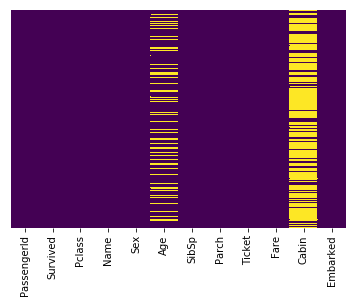

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

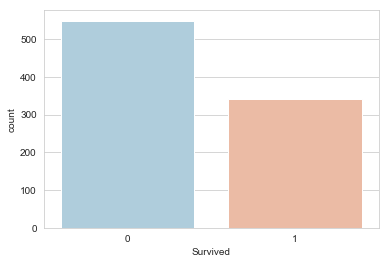

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

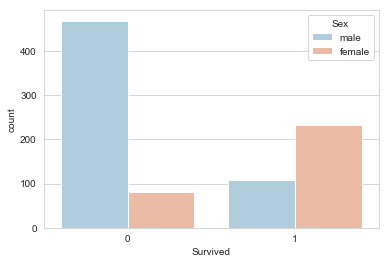

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

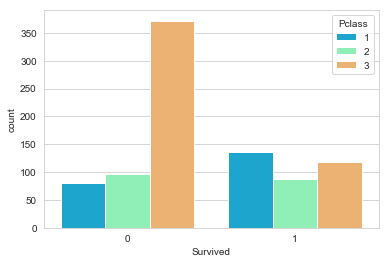

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

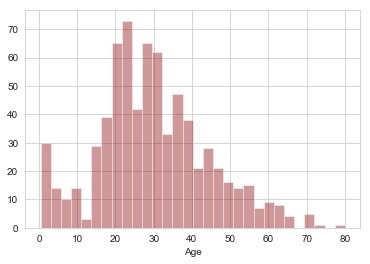

In [18]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

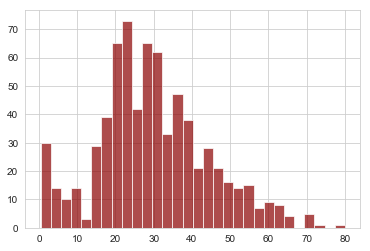

In [19]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

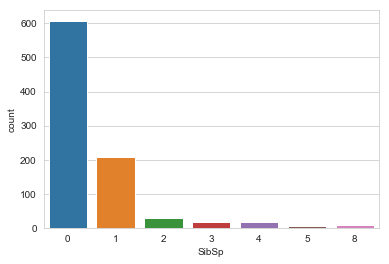

In [20]:
sns.countplot(x='SibSp',data=train)

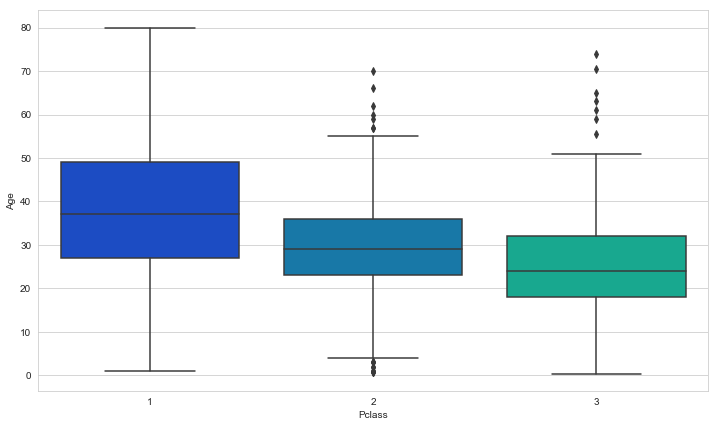

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

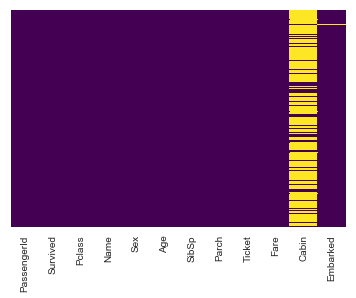

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
train.dropna(inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train = pd.concat([train,sex,embark],axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

# Training via Catboost

In [40]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(depth = 3, iterations = 2500, l2_leaf_reg= 0.0005)
classifier.fit(X_train, y_train)

0:	learn: 0.6762785	total: 74.1ms	remaining: 3m 5s
1:	learn: 0.6616013	total: 75.9ms	remaining: 1m 34s
2:	learn: 0.6505115	total: 77.6ms	remaining: 1m 4s
3:	learn: 0.6363453	total: 79.2ms	remaining: 49.4s
4:	learn: 0.6229430	total: 80.9ms	remaining: 40.4s
5:	learn: 0.6103702	total: 82.7ms	remaining: 34.4s
6:	learn: 0.6012481	total: 84.3ms	remaining: 30s
7:	learn: 0.5916930	total: 85.6ms	remaining: 26.7s
8:	learn: 0.5844704	total: 87.1ms	remaining: 24.1s
9:	learn: 0.5769454	total: 88.2ms	remaining: 22s
10:	learn: 0.5674762	total: 89.3ms	remaining: 20.2s
11:	learn: 0.5573183	total: 90.3ms	remaining: 18.7s
12:	learn: 0.5478880	total: 91.2ms	remaining: 17.5s
13:	learn: 0.5429101	total: 92.2ms	remaining: 16.4s
14:	learn: 0.5354473	total: 93.1ms	remaining: 15.4s
15:	learn: 0.5300331	total: 94.1ms	remaining: 14.6s
16:	learn: 0.5261123	total: 95ms	remaining: 13.9s
17:	learn: 0.5194111	total: 96ms	remaining: 13.2s
18:	learn: 0.5135193	total: 97ms	remaining: 12.7s
19:	learn: 0.5094501	total: 97.

179:	learn: 0.3531281	total: 247ms	remaining: 3.18s
180:	learn: 0.3528660	total: 248ms	remaining: 3.17s
181:	learn: 0.3524851	total: 249ms	remaining: 3.17s
182:	learn: 0.3521107	total: 250ms	remaining: 3.17s
183:	learn: 0.3519101	total: 251ms	remaining: 3.16s
184:	learn: 0.3512106	total: 252ms	remaining: 3.15s
185:	learn: 0.3510424	total: 253ms	remaining: 3.15s
186:	learn: 0.3503960	total: 254ms	remaining: 3.14s
187:	learn: 0.3500396	total: 255ms	remaining: 3.14s
188:	learn: 0.3498586	total: 256ms	remaining: 3.13s
189:	learn: 0.3495652	total: 258ms	remaining: 3.13s
190:	learn: 0.3493934	total: 259ms	remaining: 3.13s
191:	learn: 0.3492009	total: 260ms	remaining: 3.12s
192:	learn: 0.3490295	total: 262ms	remaining: 3.13s
193:	learn: 0.3472761	total: 263ms	remaining: 3.12s
194:	learn: 0.3470298	total: 264ms	remaining: 3.12s
195:	learn: 0.3465085	total: 266ms	remaining: 3.13s
196:	learn: 0.3461771	total: 267ms	remaining: 3.12s
197:	learn: 0.3458876	total: 269ms	remaining: 3.13s
198:	learn: 

350:	learn: 0.2840886	total: 418ms	remaining: 2.56s
351:	learn: 0.2834165	total: 419ms	remaining: 2.55s
352:	learn: 0.2832416	total: 420ms	remaining: 2.55s
353:	learn: 0.2829680	total: 421ms	remaining: 2.55s
354:	learn: 0.2828587	total: 422ms	remaining: 2.55s
355:	learn: 0.2825337	total: 423ms	remaining: 2.55s
356:	learn: 0.2824095	total: 424ms	remaining: 2.54s
357:	learn: 0.2822119	total: 425ms	remaining: 2.54s
358:	learn: 0.2817354	total: 426ms	remaining: 2.54s
359:	learn: 0.2815897	total: 427ms	remaining: 2.54s
360:	learn: 0.2814209	total: 428ms	remaining: 2.54s
361:	learn: 0.2810967	total: 429ms	remaining: 2.54s
362:	learn: 0.2810248	total: 430ms	remaining: 2.53s
363:	learn: 0.2808376	total: 432ms	remaining: 2.53s
364:	learn: 0.2805306	total: 433ms	remaining: 2.53s
365:	learn: 0.2802261	total: 434ms	remaining: 2.53s
366:	learn: 0.2800398	total: 435ms	remaining: 2.53s
367:	learn: 0.2798757	total: 436ms	remaining: 2.53s
368:	learn: 0.2797856	total: 437ms	remaining: 2.52s
369:	learn: 

528:	learn: 0.2275937	total: 587ms	remaining: 2.19s
529:	learn: 0.2275201	total: 589ms	remaining: 2.19s
530:	learn: 0.2270551	total: 590ms	remaining: 2.19s
531:	learn: 0.2269117	total: 591ms	remaining: 2.19s
532:	learn: 0.2268173	total: 592ms	remaining: 2.18s
533:	learn: 0.2267185	total: 593ms	remaining: 2.18s
534:	learn: 0.2265320	total: 594ms	remaining: 2.18s
535:	learn: 0.2263716	total: 595ms	remaining: 2.18s
536:	learn: 0.2262614	total: 596ms	remaining: 2.18s
537:	learn: 0.2258196	total: 597ms	remaining: 2.18s
538:	learn: 0.2256683	total: 598ms	remaining: 2.18s
539:	learn: 0.2252447	total: 599ms	remaining: 2.17s
540:	learn: 0.2250232	total: 600ms	remaining: 2.17s
541:	learn: 0.2245528	total: 602ms	remaining: 2.17s
542:	learn: 0.2244028	total: 603ms	remaining: 2.17s
543:	learn: 0.2242714	total: 604ms	remaining: 2.17s
544:	learn: 0.2238180	total: 605ms	remaining: 2.17s
545:	learn: 0.2234762	total: 606ms	remaining: 2.17s
546:	learn: 0.2231573	total: 607ms	remaining: 2.17s
547:	learn: 

703:	learn: 0.1875037	total: 759ms	remaining: 1.94s
704:	learn: 0.1872833	total: 760ms	remaining: 1.93s
705:	learn: 0.1870295	total: 761ms	remaining: 1.93s
706:	learn: 0.1869614	total: 762ms	remaining: 1.93s
707:	learn: 0.1868721	total: 763ms	remaining: 1.93s
708:	learn: 0.1867858	total: 764ms	remaining: 1.93s
709:	learn: 0.1865430	total: 764ms	remaining: 1.93s
710:	learn: 0.1863238	total: 765ms	remaining: 1.92s
711:	learn: 0.1861204	total: 766ms	remaining: 1.92s
712:	learn: 0.1858568	total: 767ms	remaining: 1.92s
713:	learn: 0.1855327	total: 769ms	remaining: 1.92s
714:	learn: 0.1851755	total: 770ms	remaining: 1.92s
715:	learn: 0.1841541	total: 771ms	remaining: 1.92s
716:	learn: 0.1835998	total: 772ms	remaining: 1.92s
717:	learn: 0.1835072	total: 773ms	remaining: 1.92s
718:	learn: 0.1832076	total: 774ms	remaining: 1.92s
719:	learn: 0.1831406	total: 776ms	remaining: 1.92s
720:	learn: 0.1827177	total: 777ms	remaining: 1.92s
721:	learn: 0.1826235	total: 777ms	remaining: 1.91s
722:	learn: 

984:	learn: 0.1364434	total: 1.07s	remaining: 1.65s
985:	learn: 0.1362826	total: 1.07s	remaining: 1.65s
986:	learn: 0.1361723	total: 1.07s	remaining: 1.65s
987:	learn: 0.1360533	total: 1.08s	remaining: 1.65s
988:	learn: 0.1359169	total: 1.08s	remaining: 1.65s
989:	learn: 0.1357644	total: 1.08s	remaining: 1.65s
990:	learn: 0.1355421	total: 1.08s	remaining: 1.64s
991:	learn: 0.1354390	total: 1.08s	remaining: 1.64s
992:	learn: 0.1353110	total: 1.08s	remaining: 1.64s
993:	learn: 0.1352345	total: 1.08s	remaining: 1.64s
994:	learn: 0.1351295	total: 1.08s	remaining: 1.64s
995:	learn: 0.1350733	total: 1.08s	remaining: 1.64s
996:	learn: 0.1349807	total: 1.09s	remaining: 1.64s
997:	learn: 0.1348250	total: 1.09s	remaining: 1.64s
998:	learn: 0.1347303	total: 1.09s	remaining: 1.63s
999:	learn: 0.1342735	total: 1.09s	remaining: 1.63s
1000:	learn: 0.1341735	total: 1.09s	remaining: 1.63s
1001:	learn: 0.1340430	total: 1.09s	remaining: 1.63s
1002:	learn: 0.1339519	total: 1.09s	remaining: 1.63s
1003:	lea

1144:	learn: 0.1126196	total: 1.23s	remaining: 1.46s
1145:	learn: 0.1125759	total: 1.24s	remaining: 1.46s
1146:	learn: 0.1125068	total: 1.24s	remaining: 1.46s
1147:	learn: 0.1124681	total: 1.24s	remaining: 1.46s
1148:	learn: 0.1123555	total: 1.24s	remaining: 1.46s
1149:	learn: 0.1120040	total: 1.24s	remaining: 1.46s
1150:	learn: 0.1118927	total: 1.24s	remaining: 1.45s
1151:	learn: 0.1115898	total: 1.24s	remaining: 1.45s
1152:	learn: 0.1114997	total: 1.24s	remaining: 1.45s
1153:	learn: 0.1114303	total: 1.24s	remaining: 1.45s
1154:	learn: 0.1113373	total: 1.25s	remaining: 1.45s
1155:	learn: 0.1112601	total: 1.25s	remaining: 1.45s
1156:	learn: 0.1112122	total: 1.25s	remaining: 1.45s
1157:	learn: 0.1111121	total: 1.25s	remaining: 1.45s
1158:	learn: 0.1110066	total: 1.25s	remaining: 1.45s
1159:	learn: 0.1109131	total: 1.25s	remaining: 1.45s
1160:	learn: 0.1108178	total: 1.25s	remaining: 1.45s
1161:	learn: 0.1107064	total: 1.25s	remaining: 1.44s
1162:	learn: 0.1106037	total: 1.25s	remaining:

1314:	learn: 0.0942324	total: 1.4s	remaining: 1.26s
1315:	learn: 0.0941258	total: 1.4s	remaining: 1.26s
1316:	learn: 0.0940943	total: 1.4s	remaining: 1.26s
1317:	learn: 0.0939961	total: 1.4s	remaining: 1.26s
1318:	learn: 0.0939473	total: 1.4s	remaining: 1.26s
1319:	learn: 0.0938542	total: 1.41s	remaining: 1.26s
1320:	learn: 0.0937854	total: 1.41s	remaining: 1.25s
1321:	learn: 0.0937533	total: 1.41s	remaining: 1.25s
1322:	learn: 0.0936776	total: 1.41s	remaining: 1.25s
1323:	learn: 0.0936252	total: 1.41s	remaining: 1.25s
1324:	learn: 0.0933834	total: 1.41s	remaining: 1.25s
1325:	learn: 0.0932883	total: 1.41s	remaining: 1.25s
1326:	learn: 0.0931673	total: 1.41s	remaining: 1.25s
1327:	learn: 0.0931134	total: 1.42s	remaining: 1.25s
1328:	learn: 0.0929921	total: 1.42s	remaining: 1.25s
1329:	learn: 0.0926056	total: 1.42s	remaining: 1.25s
1330:	learn: 0.0924936	total: 1.42s	remaining: 1.25s
1331:	learn: 0.0924579	total: 1.42s	remaining: 1.25s
1332:	learn: 0.0924223	total: 1.42s	remaining: 1.25

1607:	learn: 0.0714153	total: 1.73s	remaining: 962ms
1608:	learn: 0.0713165	total: 1.74s	remaining: 961ms
1609:	learn: 0.0711741	total: 1.74s	remaining: 961ms
1610:	learn: 0.0709690	total: 1.74s	remaining: 960ms
1611:	learn: 0.0708527	total: 1.74s	remaining: 959ms
1612:	learn: 0.0706503	total: 1.74s	remaining: 958ms
1613:	learn: 0.0706173	total: 1.74s	remaining: 958ms
1614:	learn: 0.0705843	total: 1.75s	remaining: 958ms
1615:	learn: 0.0705184	total: 1.75s	remaining: 957ms
1616:	learn: 0.0704335	total: 1.75s	remaining: 956ms
1617:	learn: 0.0704002	total: 1.75s	remaining: 956ms
1618:	learn: 0.0700983	total: 1.75s	remaining: 955ms
1619:	learn: 0.0700585	total: 1.76s	remaining: 954ms
1620:	learn: 0.0700300	total: 1.76s	remaining: 953ms
1621:	learn: 0.0699679	total: 1.76s	remaining: 952ms
1622:	learn: 0.0699412	total: 1.76s	remaining: 951ms
1623:	learn: 0.0698829	total: 1.76s	remaining: 950ms
1624:	learn: 0.0696905	total: 1.76s	remaining: 949ms
1625:	learn: 0.0696096	total: 1.76s	remaining:

1900:	learn: 0.0530623	total: 2.07s	remaining: 652ms
1901:	learn: 0.0530195	total: 2.07s	remaining: 651ms
1902:	learn: 0.0529722	total: 2.07s	remaining: 650ms
1903:	learn: 0.0529415	total: 2.07s	remaining: 649ms
1904:	learn: 0.0528555	total: 2.07s	remaining: 648ms
1905:	learn: 0.0528148	total: 2.08s	remaining: 647ms
1906:	learn: 0.0527977	total: 2.08s	remaining: 646ms
1907:	learn: 0.0525956	total: 2.08s	remaining: 645ms
1908:	learn: 0.0525830	total: 2.08s	remaining: 644ms
1909:	learn: 0.0525613	total: 2.08s	remaining: 643ms
1910:	learn: 0.0525309	total: 2.08s	remaining: 642ms
1911:	learn: 0.0525152	total: 2.08s	remaining: 641ms
1912:	learn: 0.0524855	total: 2.08s	remaining: 640ms
1913:	learn: 0.0524499	total: 2.09s	remaining: 639ms
1914:	learn: 0.0523805	total: 2.09s	remaining: 638ms
1915:	learn: 0.0523010	total: 2.09s	remaining: 637ms
1916:	learn: 0.0522464	total: 2.09s	remaining: 636ms
1917:	learn: 0.0522113	total: 2.09s	remaining: 635ms
1918:	learn: 0.0521357	total: 2.09s	remaining:

2169:	learn: 0.0415453	total: 2.39s	remaining: 363ms
2170:	learn: 0.0415034	total: 2.39s	remaining: 362ms
2171:	learn: 0.0414503	total: 2.39s	remaining: 361ms
2172:	learn: 0.0413823	total: 2.39s	remaining: 360ms
2173:	learn: 0.0413382	total: 2.39s	remaining: 359ms
2174:	learn: 0.0413003	total: 2.4s	remaining: 358ms
2175:	learn: 0.0412521	total: 2.4s	remaining: 357ms
2176:	learn: 0.0412299	total: 2.4s	remaining: 356ms
2177:	learn: 0.0412030	total: 2.4s	remaining: 355ms
2178:	learn: 0.0411845	total: 2.4s	remaining: 354ms
2179:	learn: 0.0410975	total: 2.4s	remaining: 352ms
2180:	learn: 0.0410525	total: 2.4s	remaining: 351ms
2181:	learn: 0.0410151	total: 2.4s	remaining: 350ms
2182:	learn: 0.0409907	total: 2.4s	remaining: 349ms
2183:	learn: 0.0409665	total: 2.4s	remaining: 348ms
2184:	learn: 0.0409486	total: 2.41s	remaining: 347ms
2185:	learn: 0.0409330	total: 2.41s	remaining: 346ms
2186:	learn: 0.0408983	total: 2.41s	remaining: 345ms
2187:	learn: 0.0408759	total: 2.41s	remaining: 344ms
218

2453:	learn: 0.0318063	total: 2.71s	remaining: 50.9ms
2454:	learn: 0.0317848	total: 2.72s	remaining: 49.8ms
2455:	learn: 0.0317635	total: 2.72s	remaining: 48.7ms
2456:	learn: 0.0317035	total: 2.72s	remaining: 47.6ms
2457:	learn: 0.0316716	total: 2.72s	remaining: 46.5ms
2458:	learn: 0.0316531	total: 2.72s	remaining: 45.4ms
2459:	learn: 0.0316307	total: 2.72s	remaining: 44.3ms
2460:	learn: 0.0316146	total: 2.72s	remaining: 43.2ms
2461:	learn: 0.0315972	total: 2.73s	remaining: 42.1ms
2462:	learn: 0.0315792	total: 2.73s	remaining: 41ms
2463:	learn: 0.0315513	total: 2.73s	remaining: 39.9ms
2464:	learn: 0.0315384	total: 2.73s	remaining: 38.8ms
2465:	learn: 0.0315124	total: 2.73s	remaining: 37.6ms
2466:	learn: 0.0314937	total: 2.73s	remaining: 36.5ms
2467:	learn: 0.0314770	total: 2.73s	remaining: 35.4ms
2468:	learn: 0.0314565	total: 2.73s	remaining: 34.3ms
2469:	learn: 0.0314098	total: 2.73s	remaining: 33.2ms
2470:	learn: 0.0313634	total: 2.74s	remaining: 32.1ms
2471:	learn: 0.0313365	total: 

In [41]:
predictions_catboost = classifier.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions_catboost))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       163
           1       0.77      0.69      0.73       104

   micro avg       0.80      0.80      0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

